In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

In [3]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train = df_train[['text', 'target']]
test = df_test['text']

In [6]:
train.isnull().sum()

text      0
target    0
dtype: int64

In [7]:
test.isnull().sum()

0

In [8]:
train = train.dropna()
test = test.dropna()

## removing tweets with blank space

In [9]:
train['text'].str.isspace().sum()

0

In [10]:
test.str.isspace().sum()

0

## removing tweets with no string or space

In [11]:
train[train['text'].apply(lambda s:s=='')]

,text,target


In [12]:
test[test.apply(lambda s:s=='')]

Series([], Name: text, dtype: object)

## EDA on Bag of words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import RidgeClassifier

In [14]:
count_vect = CountVectorizer(stop_words='english')

In [15]:
real_disaster_matrix = count_vect.fit_transform(train[train['target'] == 1]['text'])
freqs = zip(count_vect.get_feature_names(), real_disaster_matrix.sum(axis=0).tolist()[0])
print('Top 20 keywords for real disaster tweets')
print(sorted(freqs, key=lambda x:-x[1])[:20])

Top 20 keywords for real disaster tweets
[('http', 2382), ('û_', 172), ('news', 140), ('amp', 135), ('https', 134), ('disaster', 121), ('california', 115), ('suicide', 112), ('police', 109), ('people', 105), ('killed', 95), ('like', 94), ('hiroshima', 92), ('just', 89), ('storm', 89), ('fires', 86), ('crash', 85), ('families', 81), ('train', 79), ('emergency', 77)]


In [16]:
non_disaster_matrix = count_vect.fit_transform(train[train['target'] == 0]['text'])
freqs = zip(count_vect.get_feature_names(), non_disaster_matrix.sum(axis=0).tolist()[0])
print('Top 20 keywords for non disaster tweets')
print(sorted(freqs, key=lambda x:-x[1])[:20])

Top 20 keywords for non disaster tweets
[('http', 1927), ('https', 277), ('like', 254), ('just', 234), ('amp', 209), ('û_', 176), ('new', 170), ('don', 138), ('body', 116), ('video', 96), ('people', 95), ('love', 90), ('day', 86), ('know', 86), ('time', 85), ('got', 84), ('emergency', 81), ('going', 76), ('let', 76), ('youtube', 76)]


In [39]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [40]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [41]:
test_tfidf = tfidf.transform(test)

## Modelling

In [21]:
rc = RidgeClassifier()

In [23]:
pipe_rc = Pipeline([('tfidf',TfidfVectorizer()),('model',RidgeClassifier())])

In [27]:
pipe_rc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', RidgeClassifier())])

In [30]:
preds_rc = pipe_rc.predict(test)

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report

In [51]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [53]:
param = {'alpha': [i for i in np.linspace(0,1, 11)],
        'fit_prior': [True, False]}

nb_model = MultinomialNB()
grid_NB = GridSearchCV(nb_model, param)

In [60]:
param = {'alpha': [i for i in np.linspace(0,1, 11)],
        'fit_prior': [True, False]}

bernoulli_model = BernoulliNB()
grid_bernoulli = GridSearchCV(bernoulli_model, param)

In [62]:
grid_bernoulli.fit(X_train_tfidf, y_train)

C:\Users\anirb\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\anirb\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\anirb\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\anirb\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\anirb\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in n

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                                   0.6000000000000001, 0.7000000000000001, 0.8,
                                   0.9, 1.0],
                         'fit_prior': [True, False]})

In [64]:
grid_bernoulli.best_params_

{'alpha': 0.8, 'fit_prior': True}

In [65]:
preds = grid_bernoulli.predict(X_test_tfidf)

In [66]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       892
           1       0.83      0.63      0.72       631

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.80      0.79      0.79      1523



In [72]:
sub_ber = grid_bernoulli.predict(test_tfidf)

In [ ]:
MultinomialNB(alpha=1, fit_prior=True)

In [26]:
X = train['text']
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [59]:
#CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC

In [42]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [43]:
svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [44]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       892
           1       0.80      0.65      0.72       631

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



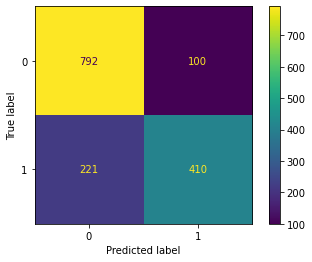

In [45]:
report(nb)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       892
           1       0.73      0.71      0.72       631

    accuracy                           0.77      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



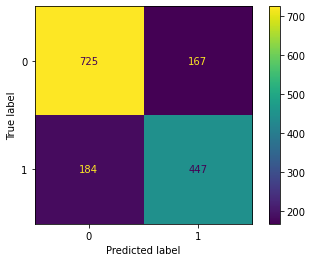

In [59]:
report(svc)

In [61]:
nb.predict(test_tfidf)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

## Using Pipeline to avoid tfidf vectorizer multiple times

In [110]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('model',LinearSVC())])

In [111]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LinearSVC())])

In [99]:
test_tweet = ['good Weather']
pipe.predict(test_tweet)

array([1], dtype=int64)

In [100]:
preds_nb = pipe.predict(test)

In [71]:
len(df_test)

3263

In [73]:
submission = pd.DataFrame(data=sub_ber, columns=['target'], index = df_test.id).reset_index()

In [74]:
submission.rename(columns={'index': 'id'}, inplace=True)

In [75]:
submission.to_csv('Submission_Ber1.csv', index=False)